In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

fontfamily = "Inconsolata"

sns.set_theme(style="whitegrid",
              context="paper",
              font_scale=1.25,
              rc={
                  "figure.figsize": (10.5, 4.5),
                  "figure.dpi": 150,
                  "grid.alpha": 0.1,
                  "grid.color": "#1b262c",
                  "grid.linewidth": 0.5,
                  "font.family": fontfamily
              })

_30k = ["#202f66", "#ff7048", "#7f68d0", "#f3d36e", "#d869ab", "#48ADA9", "#1b262c"]
sns.set_palette(_30k)

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

plotly_config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 900,
    'width': 2100,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

# custom plotly font
plotly_fontsize = 14
pio.templates[pio.templates.default].layout['font']["family"] = fontfamily
pio.templates[pio.templates.default].layout['font']["size"] = plotly_fontsize
pio.templates[pio.templates.default].layout['title']['font']['size'] = round(plotly_fontsize*1.6)

import os
from PIL import Image

from utils.Color import Color
from utils.ExtractColor import extract_palette

# Select Image

In [2]:
img_path = "./Lio_de_lion_and_boys.png"

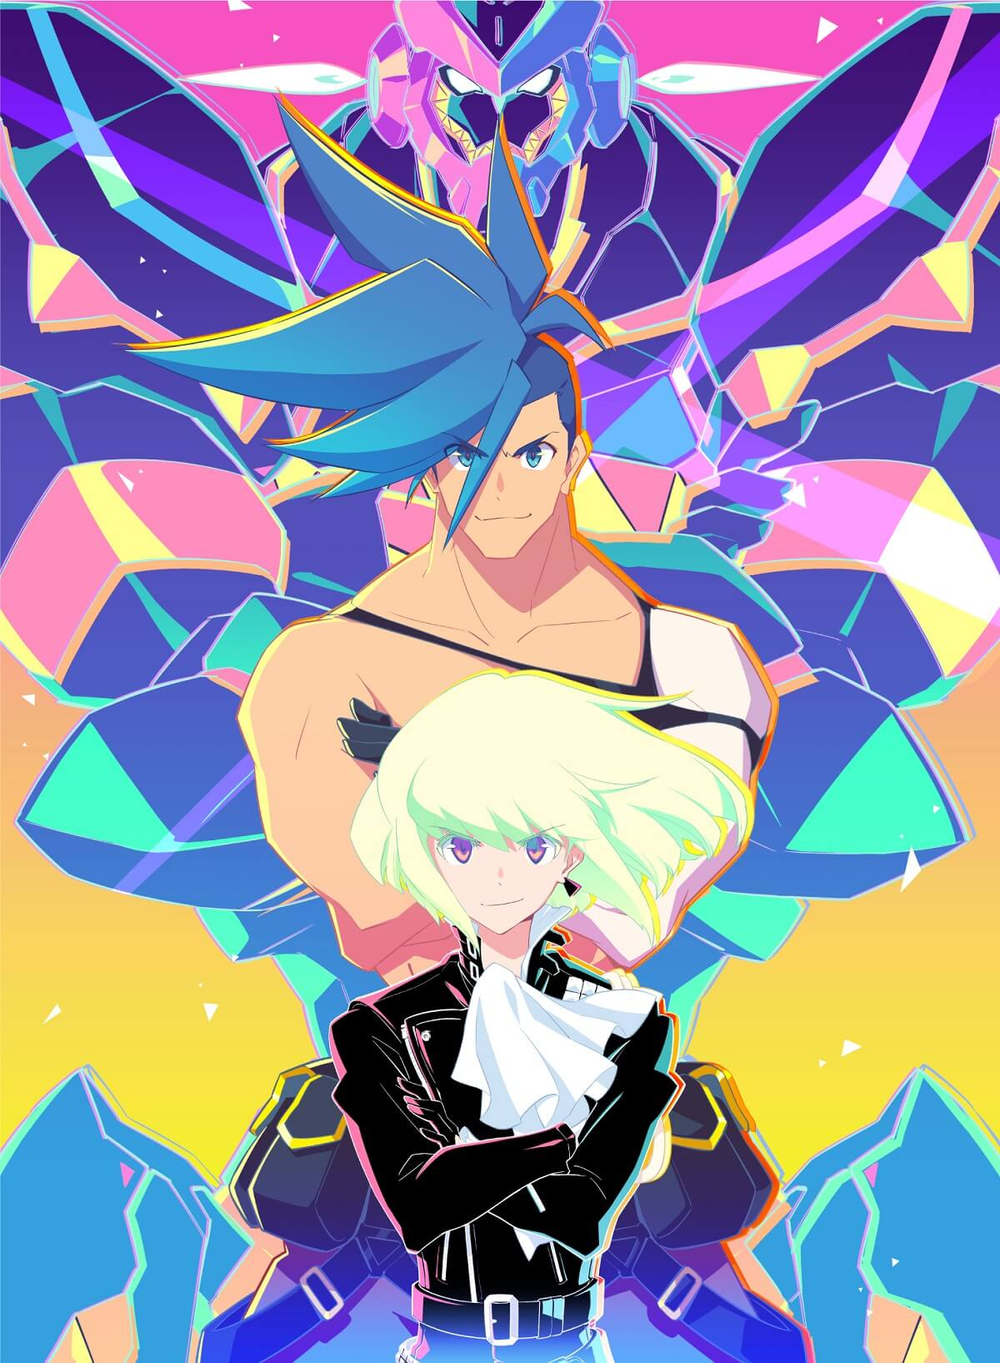

In [3]:
img  = Image.open(img_path)
img

In [8]:
palette = extract_palette(img_path, deltaE_threshold=15, max_width=256)
palette.head()

(47872, 3)
Resize image, convert it to data frame: 1.991e-01 s
iteration     0/26031: 4.053e-06 s
iteration   500/26031: 5.747e+01 s
iteration  1000/26031: 6.149e+01 s
iteration  1500/26031: 6.152e+01 s
iteration  2000/26031: 6.541e+01 s
iteration  2500/26031: 6.919e+01 s
iteration  3000/26031: 8.383e+01 s
iteration  3500/26031: 9.839e+01 s
iteration  4000/26031: 9.841e+01 s
iteration  4500/26031: 9.843e+01 s
iteration  5000/26031: 1.053e+02 s
iteration  5500/26031: 1.153e+02 s
iteration  6000/26031: 1.185e+02 s
iteration  6500/26031: 1.185e+02 s
iteration  7000/26031: 1.185e+02 s
iteration  7500/26031: 1.186e+02 s
iteration  8000/26031: 1.186e+02 s
iteration  8500/26031: 1.186e+02 s
iteration  9000/26031: 1.186e+02 s
iteration  9500/26031: 1.187e+02 s
iteration 10000/26031: 1.187e+02 s
iteration 10500/26031: 1.187e+02 s
iteration 11000/26031: 1.187e+02 s
iteration 11500/26031: 1.187e+02 s
iteration 12000/26031: 1.188e+02 s
iteration 12500/26031: 1.188e+02 s
iteration 13000/26031: 1.18

,color,freq,ratio
0,#5350bb,10622,0.221883
1,#34a0e0,7507,0.156814
2,#ff8dbe,5376,0.112299
3,#fffddc,5010,0.104654
4,#fdd0a9,4584,0.095755


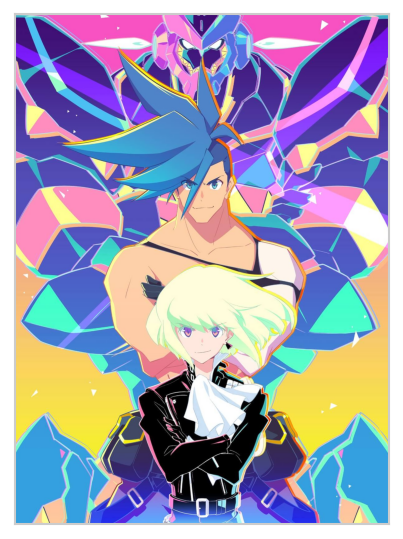

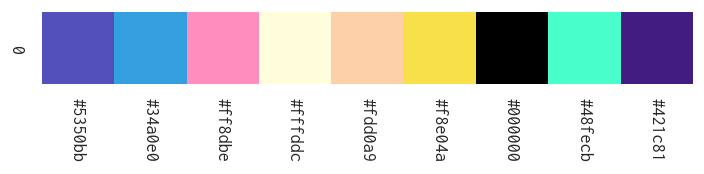

In [9]:
MOST_USED = 0.975
most_used = palette[palette['ratio'] >= 1-MOST_USED]

plt.imshow(img)
plt.grid(False)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

fig = plt.figure(figsize=(7, 2), dpi=120)
sns.heatmap([most_used.index], cmap=most_used['color'].tolist(), square=True, cbar=False)
plt.xticks(most_used.index+0.5, most_used['color'], rotation=-90)
plt.show()

In [10]:
# if want to filter most used color
# palette = palette[palette['ratio'] >= 1-MOST_USED]

In [11]:
# save palette

color_names = ['background', 'chart_annot', 'title_text', 'red', 'blue', 'green', 'orange', 'text_s',]
type_arr = len(color_names)*['accent']
note_arr = len(color_names)*['']


palette['name'] = color_names
palette['type'] = type_arr
palette['note'] = note_arr

palette_named = palette[['name', 'color', 'type', 'note']]
palette_named

ValueError: Length of values (8) does not match length of index (39)

In [ ]:
palette_named.to_csv("./palettes/new_palette.csv", index=False)